![Astrofisica Computacional](../../logo.PNG)

---
## 38. Animación 3D del movimiento de un Cometa

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

Utilizando los datos obtenidos anteriormente para el movimiento 3-dimensional de un cometa, se creará una animación para mostrar la orbita en el espacio.

---

## El Sistema Cometa-Sol

En este cuaderno se utilizarán los datos obtenidos en la descripción 3-dimensional del movimiento orbital de un cometa alrededor del Sol, almacenados en el archivo `'comet_orbit3D.txt'`.

El sistema de unidades de medida será

- unidad de masa: masa Solar $(M_{\odot})$
- unidad de distancia: Unidad Astronómica $(\text{ au})$
- unidad de tiemo: año $(yr)$


In [1]:
import numpy as np

# Read and unpack the data from the file.
# The format includes coordinates and velocities: x y z vx vy vz
x, y, z, vx, vy, vz= np.loadtxt('comet_orbit3D.txt', unpack=True)

---
## Gráfico Simple 3D

Primero visualizaremos la orbita con un gráfico simple 3D

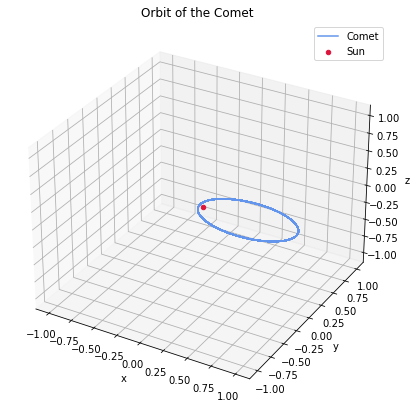

In [4]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
%matplotlib inline

# Boundaries of the plot
boundary = max(abs(np.max(x)), abs(np.min(x)), abs(np.max(y)), 
               abs(np.min(y)), abs(np.max(z)), abs(np.min(z)))*1.1

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(0., 0., 0., color=('crimson'), label='Sun')
ax.plot(x, y, z, color=('cornflowerblue'), label='Comet')

ax.set_xlim3d(-boundary, boundary)
ax.set_ylim3d(-boundary, boundary)
ax.set_zlim3d(-boundary, boundary)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Orbit of the Comet')
ax.legend()
plt.show()


---

## Creando la Animación

Para crear la animación 3D, se utilizará la libreria [matplotlib.animation](https://matplotlib.org/stable/api/animation_api.html)

Para visualizar la animación creada en el cuaderno de jupyter, se utilizará la función [IPython.display.HTML](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)

In [5]:
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

El primer paso es generar el escenario como una figura y un conjunto de ejes,

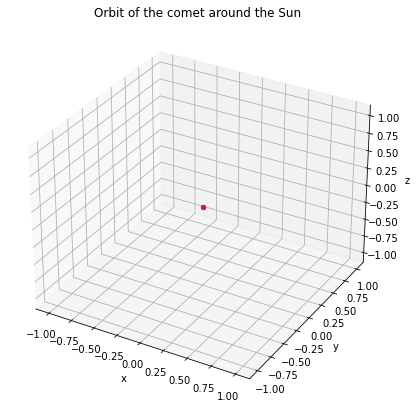

In [6]:
# create a figure and axes
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection="3d")

# Setting the axes properties
ax.set_xlim3d(-boundary, boundary)
ax.set_ylim3d(-boundary, boundary)
ax.set_zlim3d(-boundary, boundary)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title('Orbit of the comet around the Sun')

# Defines the location of the Sun
ax.scatter([0.], [0.], [0.], color=('crimson'), label='Sun')

In [5]:
# Total number of frames
N = len(x)
N

100000

Ahora se define la función que se encargará de dibujar cada frame con los datos. Para generar una figura 3D se necesitan algunos argumentos extra que corresponden a los datos de coordenadas  y las lineas que se dibujarán.

In [7]:
def animate(i, data_lines, lines):
    for line, data in zip(lines, data_lines):
        # NOTE: there is no .set_data() for 3 dim data
        line.set_data(data[0:2, :50*i])
        line.set_3d_properties(data[2, :50*i])
    return lines

La función [matplotlib.animation.FuncAnimation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html) creará la animación por frames. En esta ocasión se crearán 200 frames con una duración de 50 ms cada uno.



In [8]:
# store the coordinates data into an array
data=[np.array([x, y, z])]

# We change the limit of memory for embedded animation becuase
# this animation exceeds the predetermined limit
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128


# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], 
                 color='cornflowerblue')[0] for dat in data]

# Creating the Animation object
anim = animation.FuncAnimation(fig, animate, 
                               frames=500, fargs=(data, lines), interval=20)

# blit=True re-draws only the parts that have changed.
# Note the fargs in the FuncAnimation function.
#plt.show()

Para visualizar la animación, transformaremos el objeto `anim` en un video jshtml,

In [2]:
HTML(anim.to_jshtml())

o también ser puede crear un video de html5 utilizando

In [1]:
HTML(anim.to_html5_video())